In [1]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

df= pd.read_csv('data.csv')
df.sample(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
8930,Volvo,S70,2000,regular unleaded,168.0,5.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,26,19,870,2403
7678,Toyota,Prius Prime,2017,regular unleaded,121.0,4.0,AUTOMATIC,front wheel drive,4.0,"Hatchback,Hybrid",Compact,4dr Hatchback,53,55,2031,28800
1177,Hyundai,Accent,2015,regular unleaded,137.0,4.0,MANUAL,front wheel drive,4.0,NaN,Compact,Sedan,38,27,1439,14745
6036,Volkswagen,Jetta GLI,2014,premium unleaded (recommended),210.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,Performance,Midsize,Sedan,32,24,873,25635
4803,Suzuki,Forenza,2006,regular unleaded,126.0,4.0,MANUAL,front wheel drive,4.0,NaN,Compact,Sedan,28,20,481,15099


In [2]:
#average MPG
for i in range(len(df)):
    average_MPG = (df.loc[i, 'highway MPG'] + df.loc[i, 'city mpg']) / 2
    df.loc[i, 'average MPG'] = average_MPG
df.sample(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,average MPG
4120,Cadillac,Escalade ESV,2016,premium unleaded (recommended),420.0,8.0,AUTOMATIC,four wheel drive,4.0,"Luxury,Performance",Large,4dr SUV,21,15,1624,94950,18.0
7922,Infiniti,QX50,2015,premium unleaded (recommended),325.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Luxury,Performance",Midsize,4dr SUV,24,17,190,38600,20.5
8531,Buick,Riviera,1997,regular unleaded,205.0,6.0,AUTOMATIC,front wheel drive,2.0,NaN,Large,Coupe,26,17,155,2000,21.5
9179,Suzuki,Sidekick,1996,regular unleaded,120.0,4.0,MANUAL,four wheel drive,4.0,NaN,Compact,4dr SUV,23,20,481,2000,21.5
4522,Ford,F-150,2016,flex-fuel (unleaded/E85),282.0,6.0,AUTOMATIC,rear wheel drive,2.0,Flex Fuel,Large,Regular Cab Pickup,25,18,5657,26840,21.5


In [3]:
#missing data
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data

,Total,Percent
Market Category,3742,0.314084
Engine HP,69,0.005792
Engine Cylinders,30,0.002518
Number of Doors,6,0.000504
Engine Fuel Type,3,0.000252
Driven_Wheels,0,0.000000
Model,0,0.000000
Year,0,0.000000
Transmission Type,0,0.000000
average MPG,0,0.000000


In [4]:
#fill&drop
df = df.drop(['highway MPG', 'city mpg'], axis = 1).reset_index(drop=True)
df['Market Category'] = df['Market Category'].fillna('non')
df = df.dropna(axis = 0).reset_index(drop=True)
df.sample(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,Popularity,MSRP,average MPG
10519,Chevrolet,TrailBlazer,2008,regular unleaded,285.0,6.0,AUTOMATIC,four wheel drive,4.0,non,Midsize,4dr SUV,1385,29880,17.0
11204,Hyundai,Veracruz,2012,regular unleaded,260.0,6.0,AUTOMATIC,all wheel drive,4.0,Crossover,Midsize,4dr SUV,1439,30245,18.5
6923,Mitsubishi,Montero Sport,2004,regular unleaded,197.0,6.0,AUTOMATIC,rear wheel drive,4.0,non,Midsize,4dr SUV,436,23999,17.0
10766,Nissan,Truck,1997,regular unleaded,134.0,4.0,MANUAL,rear wheel drive,2.0,non,Compact,Extended Cab Pickup,2009,2550,21.0
9503,Chevrolet,Silverado 1500,2016,flex-fuel (unleaded/E85),285.0,6.0,AUTOMATIC,rear wheel drive,4.0,Flex Fuel,Large,Crew Cab Pickup,1385,37345,21.0


In [5]:
#missing data
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data

,Total,Percent
average MPG,0,0.0
MSRP,0,0.0
Popularity,0,0.0
Vehicle Style,0,0.0
Vehicle Size,0,0.0
Market Category,0,0.0
Number of Doors,0,0.0
Driven_Wheels,0,0.0
Transmission Type,0,0.0
Engine Cylinders,0,0.0


In [6]:
#one hot encoding
X = pd.get_dummies(df, dummy_na = False, columns=['Make', 'Model', 'Engine Fuel Type', 'Transmission Type', 'Market Category', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style'] ).drop(['MSRP'],axis=1);
y = df[['MSRP']]
X.sample(5)

,Year,Engine HP,Engine Cylinders,Number of Doors,Popularity,average MPG,Make_Acura,Make_Alfa Romeo,Make_Aston Martin,Make_Audi,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
1300,2005,155.0,4.0,4.0,481,25.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5206,2014,570.0,10.0,2.0,1158,16.5,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3967,2017,197.0,4.0,4.0,155,24.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2965,2015,650.0,8.0,2.0,1385,18.5,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
11188,2014,181.0,4.0,4.0,2031,23.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

# Split dataset into training and testing
print('Splitting into training and testing...')
y_unraveled = np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_unraveled, test_size=0.3)
print("Done training best classifier.")

# 特徵標準化(Standardization)¶
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()   # initial
sc.fit(X_train)   # fit
X_train_std = sc.transform(X_train)   # 可得到標準化的訓練資料集
X_test_std = sc.transform(X_test)      # 可得到標準化的測試資料集

print('Training classifier...')
clf = RandomForestRegressor(n_estimators=100, max_features="sqrt");
# The gradient boosting classifier didnt finish running
# clf = GradientBoostingClassifier(n_estimators=5)
clf = clf.fit(X_train_std, y_train);
print("Done training best classifier.")

print('Calculating error...')
y_pred = clf.predict(X_test_std);
scores = cross_val_score(clf,X_test_std,y_test, cv = 5)
print()

print("Scores:")
print(scores);
print("Mean Squared Error")
print(np.mean((y_test - clf.predict(X_test))**2))
print("Mean absolute error:");
mean_error = sum(abs(y_test-y_pred))/len(y_test);
print(mean_error);
print("Mean percent error: ")
print(mean_error/np.mean(y_test))
print("R Square:")
print(clf.score(X_test_std,y_test))
print()

print("ypred:");
print(y_test);
print(y_pred);

Splitting into training and testing...
Done training best classifier.
Training classifier...
Done training best classifier.
Calculating error...

Scores:
[0.96698997 0.86112362 0.68274737 0.96932018 0.92794801]
Mean Squared Error
39680061377.64949
Mean absolute error:
3548.02854691242
Mean percent error: 
0.08833609919497783
R Square:
0.9302975908244377

ypred:
[25375 75465 21790 ... 35270 47950 38875]
[28187.8        84074.74833333 23350.43130952 ... 32195.28680556
 46445.24285714 39667.355     ]


Automatically created module for IPython interactive environment


<module 'matplotlib.pyplot' from 'C:\\Users\\user\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

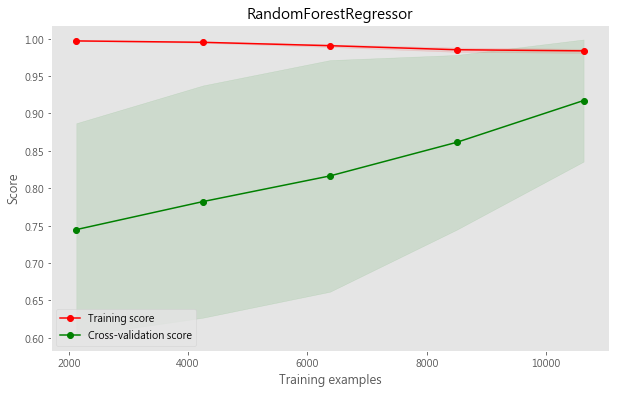

In [8]:
# Scikit-Learn 官網作圖函式, 可自動繪出validation cureve and learning curve
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit



def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure(figsize=(10,6))  #調整作圖大小
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

from sklearn.model_selection import KFold,StratifiedKFold

cv = KFold(n_splits=10, random_state=1, shuffle=True)  

# n_splits=4代表每次做KFold是 training data: test data = 3:1, shuffle=True表示將資料隨機打亂後, 再切成4等份
# random_state=None表示每次切都是不相同

sc.fit(X)

plot_learning_curve(clf, "RandomForestRegressor", sc.transform(X), y_unraveled, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))

# np.linspace(0.2, 1.0, 5)是指切成 0.2 , 0.4, 0.6 , 0.8, 1，中間四個間隔是均分。
# 所有的X共1288筆(X.count()) ，如果cv中的n_splits=4代表每次做KFold是 training data: test data = 3:1  (test data is 1288*(1/4))
# 所以總共可用的訓練資料是1288*(3/4) = 966
# 為了觀察訓練資料學習曲線和驗證曲線的變化，所以用例如np.linspace(0.2, 1, 5)的比例再切訓練資料
# 共做五次的KFold，每次用到的訓練資料量依序是：966*0.2、966*0.4、966*0.6、....966*1
# 每次KFold的測試資料量就是：966*0.2*(1/3)、966*0.4*(1/3)...
# 再計算每次Kfold中的score平均、標準差作圖 
# 圖中顯示3份training 及 1份cross-validation的準確率

In [9]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=1)
elastic.fit(X_train_std, y_train)

print('各變項參數:', elastic.coef_)
print("MSE: %.2f" % np.mean((elastic.predict(X_test_std) - y_test) ** 2))
print("R Square:",elastic.score(X_test_std, y_test))

各變項參數: [3246.08828748 7586.92120737 5384.36529396 ... -950.4893182    47.05587622
 -198.35324107]
MSE: 194573863.44
R Square: 0.9336955899670871


<module 'matplotlib.pyplot' from 'C:\\Users\\user\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

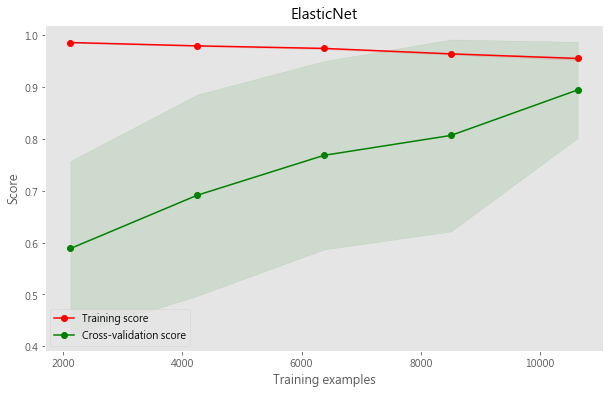

In [10]:
cv = KFold(n_splits=10, random_state=None, shuffle=True)
estimator = ElasticNet(alpha=1)

plot_learning_curve(estimator, "ElasticNet", sc.transform(X), y, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
%matplotlib inline

pca = decomposition.PCA(n_components=10)
pca.fit(X)
X = pca.transform(X)
X

array([[ 2.36254926e+03,  7.88556575e+01, -5.31496462e-01, ...,
        -1.63326047e-01,  1.96459177e-01, -1.43876545e-01],
       [ 2.36245164e+03,  4.38547399e+01,  1.34318615e-01, ...,
        -3.96045366e-01,  3.79547969e-01, -2.62127510e-01],
       [ 2.36245161e+03,  4.38411541e+01,  4.23660995e-01, ...,
        -2.34449624e-01,  3.12791159e-01, -2.44252362e-01],
       ...,
       [-1.34953294e+03,  5.43721826e+01, -3.91670100e-01, ...,
        -1.27878796e-01,  3.62304427e-01, -4.68376926e-01],
       [-1.34953256e+03,  5.43950522e+01,  4.24087608e-01, ...,
        -2.30714161e-01,  3.25819763e-01, -4.50863806e-01],
       [-1.49275502e+03, -2.43750760e+01, -3.85759702e+00, ...,
        -3.59881924e-01, -6.43820193e-01, -2.94870314e-01]])

In [12]:
pca.explained_variance_ratio_

array([9.94236156e-01, 5.71895924e-03, 3.19736485e-05, 9.59869189e-06,
       4.88947883e-07, 3.73275436e-07, 1.82289436e-07, 1.45182116e-07,
       1.40280155e-07, 1.24266524e-07])

In [13]:
def accumulate(x):
    p = []
    for i in range(len(x)):
        if(i==0):
            p.append(x[i])
        else:
            p.append(p[i-1]+x[i])
    return p

p_accu = accumulate(pca.explained_variance_ratio_)
p_accu

[0.9942361558651153,
 0.9999551151095721,
 0.9999870887580239,
 0.9999966874499185,
 0.999997176397802,
 0.9999975496732378,
 0.9999977319626736,
 0.9999978771447893,
 0.9999980174249444,
 0.9999981416914683]

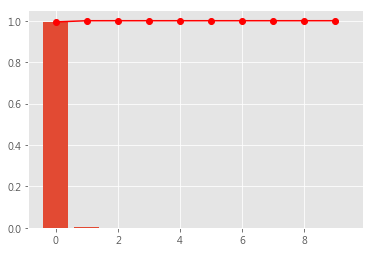

In [14]:
y1 = pca.explained_variance_ratio_
y2 = accumulate(pca.explained_variance_ratio_)
x = [i for i in range(len(y1))]

plt.figure()
plt.bar(x,y1,align='center')
plt.plot(x, y2, 'r-o')

plt.show()

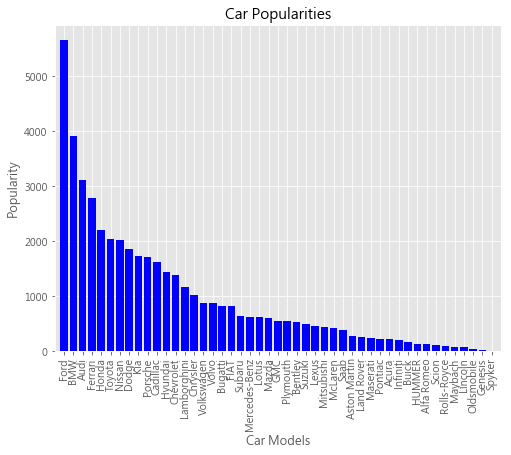

In [15]:
# If we used JSON file, this would've been easier
# This code is trying to get the data off Kaggle and making the make and popularities unique
# since the data can list them multiple times

# Make elements in cars unique and return in same order
cars = np.asarray(df['Make'])
uniquecarindices = np.unique(cars, return_index=True)[1]
cars = np.asarray([cars[index] for index in sorted(uniquecarindices)])

# Make elements in popularities unique and return in same order
popularities = np.asarray(df['Popularity'])
uniquepopularityindices = np.unique(popularities, return_index=True)[1]
popularities = np.asarray([popularities[index] for index in sorted(uniquepopularityindices)])

# Get the indices sorted on popularities from highest to lowest
popindices = np.argsort(popularities)[::-1]

# Data range
totalN = popindices.shape[0]

figsize = (8,6)
plt.figure(figsize=figsize)
plt.title("Car Popularities")
plt.bar(range(totalN), popularities[popindices], color="b", align="center")
plt.xticks(rotation=90)
plt.xticks(range(totalN), cars[popindices])
plt.xlim([-1, totalN])
plt.xlabel('Car Models')
plt.ylabel('Popularity')
plt.show()

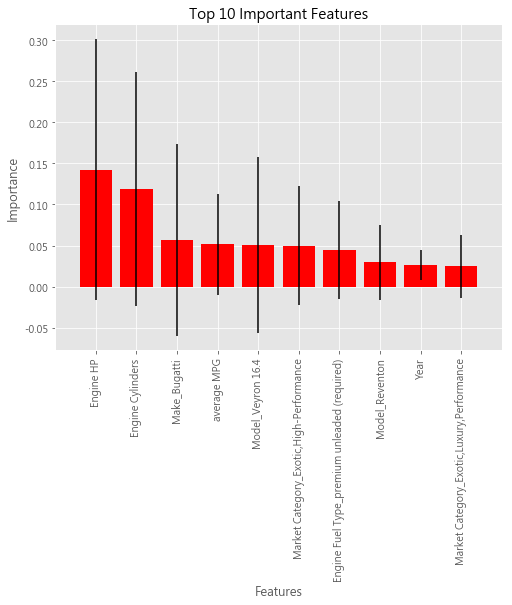

In [16]:
# Important questions to answer

# 1. What features most predict price?

# Get the importances and calculate standard deviations for each
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Get the feature names
features = X_train.columns.values

# Want the top 10 features, so limit the indices and labels
topLimit = 10 # limit to show up to, ex. top 10
indices = indices[0: topLimit] # indices for features
topLabels = features[indices[0: topLimit]] # actual feature labels, we want to print these

# Plot the feature importances of the forest (top 10)
figsize = (8,6)
plt.figure(figsize=figsize)
plt.title("Top 10 Important Features")
ax = plt.bar(range(topLimit), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(rotation=90)
plt.xticks(range(topLimit), topLabels)
plt.xlim([-1, topLimit])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()